In [1]:
import os
from snn_delays.config import CHECKPOINT_PATH
from snn_delays.utils.model_loader import ModelLoader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from snn_delays.utils.results_utils import get_results, get_states

ckpt_dir1 = 'abl1_shd50_rnn'
ckpt_dir2 = 'abl1_shd50_mf'
ckpt_dir3 = 'abl1_shd50_rd'

ckpt_dir4 = 'abl1_shd50_rnn_mt'
ckpt_dir5 = 'abl1_shd50_mf_mt'
ckpt_dir6 = 'abl1_shd50_rd_mt'

ckpt_dir7 = 'abl1_shd50_rnn_lt'
ckpt_dir8 = 'abl1_shd50_mf_lt'
ckpt_dir9 = 'abl1_shd50_rd_lt'

# delays
sweep_params_names = {
    'connection_type': ['r'],
    'delay': ['nd'],
    'structure':['2l'],
    'tau_m':['ht'],
    'T_freeze_taus':['ft', 'tt']
    }

sweep_params_names_mf = {
    'connection_type': ['mf'],
    'delay': ['nd'],
    'structure':['2l'],
    'tau_m':['ht'],
    'T_freeze_taus':['ft', 'tt']
    }

sweep_params_names_rd = {
    'connection_type': ['f'],
    'delay': ['rd'],
    'structure':['2l'],
    'tau_m':['ht'],
    'T_freeze_taus':['ft', 'tt']
    }

acc_r, spk_r, spkt_r, _, _, _, _ = get_results(ckpt_dir1, sweep_params_names, rpts=3)
_, _, _, trnloss_r, tstloss_r, _, _ = get_results(ckpt_dir1, sweep_params_names, rpts=3, mode='last')

acc_mf, spk_mf, spkt_mf, _, _, _, _ = get_results(ckpt_dir2, sweep_params_names_mf, rpts=3)
_, _, _, trnloss_mf, tstloss_mf, _, _ = get_results(ckpt_dir2, sweep_params_names_mf, rpts=3, mode='last')

acc_rd, spk_rd, spkt_rd, _, _, _, _ = get_results(ckpt_dir3, sweep_params_names_rd, rpts=3)
_, _, _, trnloss_rd, tstloss_rd, _, _ = get_results(ckpt_dir3, sweep_params_names_rd, rpts=3, mode='last')

acc_r_mt, spk_r_mt, spkt_r_mt, _, _, _, _ = get_results(ckpt_dir4, sweep_params_names, rpts=3)
_, _, _, trnloss_r_mt, tstloss_r_mt, _, _ = get_results(ckpt_dir4, sweep_params_names, rpts=3, mode='last')

acc_mf_mt, spk_mf_mt, spkt_mf_mt, _, _, _, _ = get_results(ckpt_dir5, sweep_params_names_mf, rpts=3)
_, _, _, trnloss_mf_mt, tstloss_mf_mt, _, _ = get_results(ckpt_dir5, sweep_params_names_mf, rpts=3, mode='last')

acc_rd_mt, spk_rd_mt, spkt_rd_mt, _, _, _, _ = get_results(ckpt_dir6, sweep_params_names_rd, rpts=3)
_, _, _, trnloss_rd_mt, tstloss_rd_mt, _, _ = get_results(ckpt_dir6, sweep_params_names_rd, rpts=3, mode='last')

acc_r_lt, spk_r_lt, spkt_r_lt, _, _, _, _ = get_results(ckpt_dir7, sweep_params_names, rpts=3)
_, _, _, trnloss_r_lt, tstloss_r_lt, _, _ = get_results(ckpt_dir7, sweep_params_names, rpts=3, mode='last')

acc_mf_lt, spk_mf_lt, spkt_mf_lt, _, _, _, _ = get_results(ckpt_dir8, sweep_params_names_mf, rpts=3)
_, _, _, trnloss_mf_lt, tstloss_mf_lt, _, _ = get_results(ckpt_dir8, sweep_params_names_mf, rpts=3, mode='last')

acc_rd_lt, spk_rd_lt, spkt_rd_lt, _, _, _, _ = get_results(ckpt_dir9, sweep_params_names_rd, rpts=3)
_, _, _, trnloss_rd_lt, tstloss_rd_lt, _, _ = get_results(ckpt_dir9, sweep_params_names_rd, rpts=3, mode='last')

f_rd_2l_ht_tt_rpt2_754416961130742_last_100epoch

[INFO] Delays: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39])

[INFO] Delays o: tensor([0])
None
1
Delta t: 0.02 ms
mean of normal: 6.907255237315501
Instance of <class 'snn_delays.experimental_models.snn_delay_prun.P_DelaySNN'> loaded successfully


In [2]:
def plot_boxplots(df, palette="Set3"):
    sns.set_theme(style="whitegrid")
    # Create the boxplot with customizations
    
    boxplot = sns.boxplot(data=df, palette=palette)  # Use a color palette to add color

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=10, color='darkred')

    # Add a grid with custom style
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Optional: Show median labels on each box
    for i, patch in enumerate(boxplot.artists):
        median_val = df.iloc[:, i].median()
        boxplot.text(i, median_val + 0.5, f'{median_val:.1f}%', ha='center', color='black', fontsize=10)

    return plt.gca()

Tau values used (task duration 50 timesteps) \
small taus: 0-5 timesteps (mean around 2) \
medium taus: 0-300 timesteps (mean around 50) \
large taus: 0-100K timesteps (mean around 20K) \

Text(0, 0.5, 'Spikes per neuron per timestep')

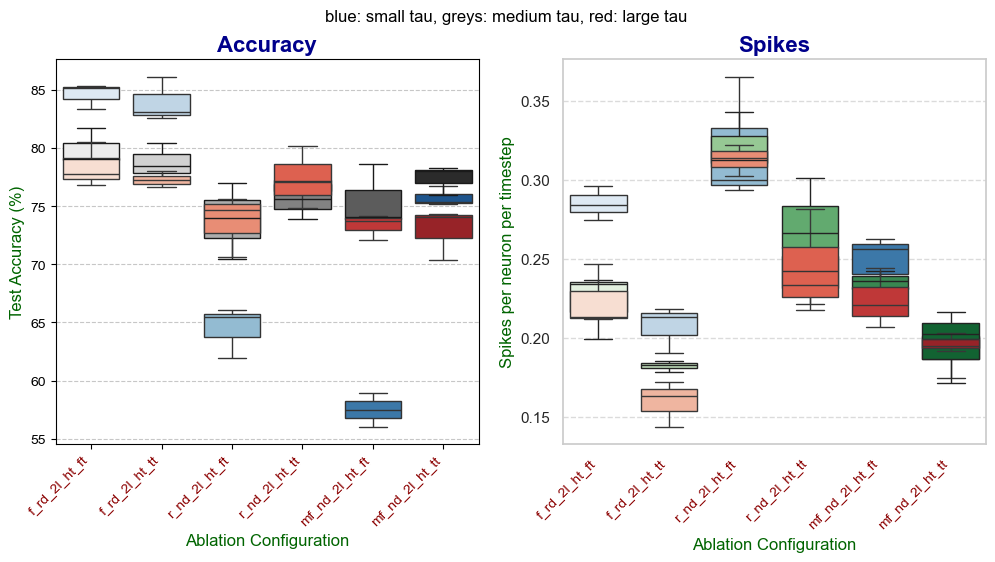

In [3]:
df_acc = pd.DataFrame(acc_rd | acc_r | acc_mf)
df_spk = pd.DataFrame(spk_rd | spk_r | spk_mf)

df_acc_mt = pd.DataFrame(acc_rd_mt | acc_r_mt | acc_mf_mt)
df_spk_mt = pd.DataFrame(spk_rd_mt | spk_r_mt | spk_mf_mt)

df_acc_lt = pd.DataFrame(acc_rd_lt | acc_r_lt | acc_mf_lt)
df_spk_lt = pd.DataFrame(spk_rd_lt | spk_r_lt | spk_mf_lt)

plt.figure(figsize=(12, 5))
plt.suptitle("blue: small tau, greys: medium tau, red: large tau")
plt.subplot(121)
plot_boxplots(df_acc, "Blues")
plot_boxplots(df_acc_mt, "Greys")
plot_boxplots(df_acc_lt, "Reds")
plt.title("Accuracy", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Test Accuracy (%)", fontsize=12, color='darkgreen')
plt.subplot(122)
plot_boxplots(df_spk, "Blues")
plot_boxplots(df_spk_mt, "Greens")
plot_boxplots(df_spk_lt, "Reds")
plt.title("Spikes", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Spikes per neuron per timestep", fontsize=12, color='darkgreen')

Delays works better with small taus. Training taus hurt performance a bit (for some reason, training taus always result in bigger taus, no matter the initialization). \
Recurrent and MF are benefitted by larger taus.
Trainability of taus has noticeable benefits for recurrent and MF if initial taus are small. \
Otherwise, trainability of taus has a modest effect. \
In enforcing activity sparsity, training taus has a benefitial effect in all cases.


In [4]:
import numpy as np
def plot_losses(nested_loss_lists, label='Mean loss', color='blue', linestyle='-'):

    # Example data: replace `nested_loss_lists` with your actual data
    #nested_loss_lists = tstloss_d['f_d_2l_hm_ft']

    # Ensure all lists have the same length and epoch indices
    epochs = [entry[0] for entry in nested_loss_lists[0]]  # Epochs
    all_losses = [np.array([entry[1] for entry in lst]) for lst in nested_loss_lists]

    # Calculate average and standard deviation
    mean_losses = np.mean(all_losses, axis=0)
    std_losses = np.std(all_losses, axis=0)

    # Plot the average loss curve with error bars
    #plt.figure(figsize=(10, 6))
    plt.plot(epochs, mean_losses, label=label, color=color, linestyle=linestyle)
    #plt.fill_between(epochs, mean_losses - std_losses, mean_losses + std_losses, color=color, alpha=0.2, label='±1 Std Dev')
    plt.fill_between(epochs, mean_losses - std_losses, mean_losses + std_losses, color=color, alpha=0.2)
    #plt.title("Average Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    return plt.gca()

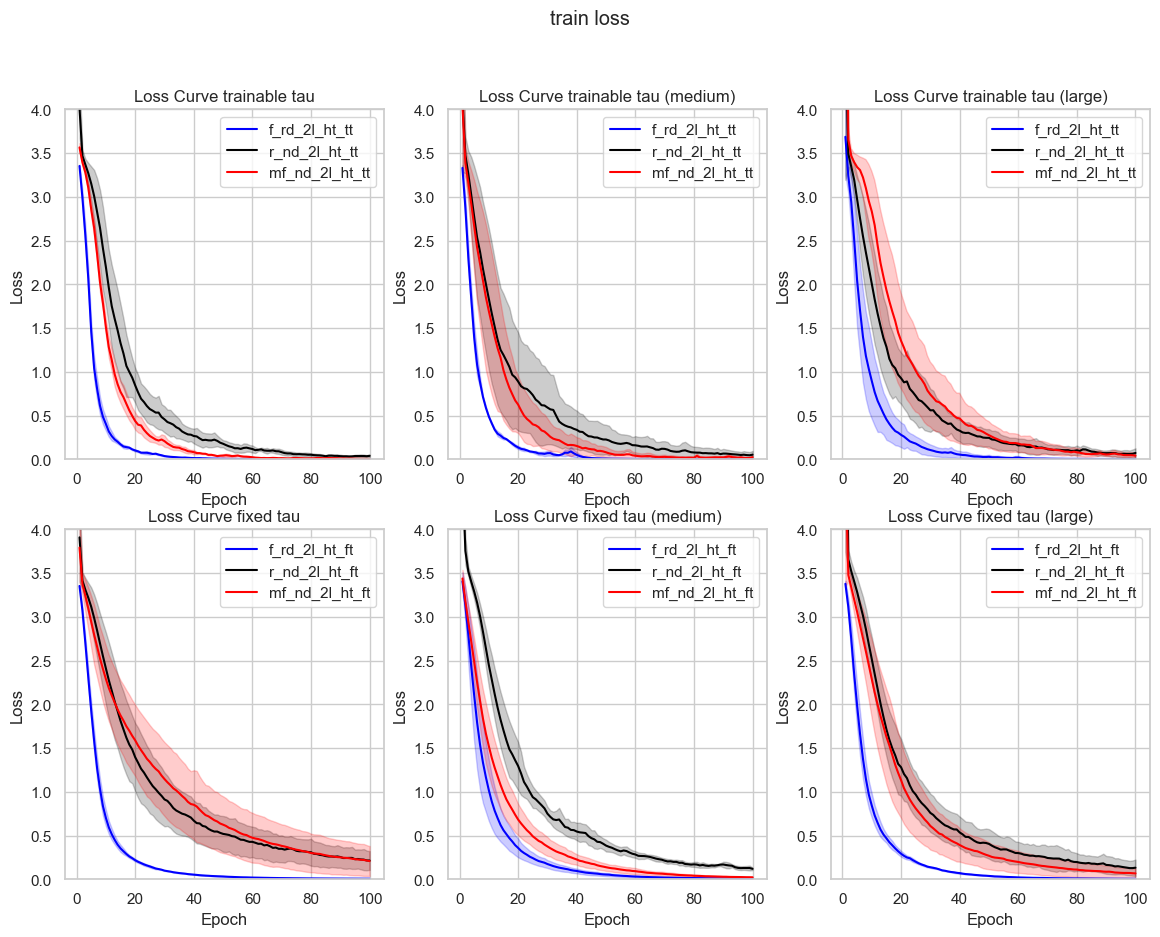

In [5]:
all_train_losses = trnloss_rd | trnloss_r | trnloss_mf
filtered_ht_tt = {key:value for key, value in all_train_losses.items() if 'ht_tt' in key}
filtered_ht_ft = {key:value for key, value in all_train_losses.items() if 'ht_ft' in key}

all_train_losses_mt = trnloss_rd_mt | trnloss_r_mt | trnloss_mf_mt
filtered_ht_tt_mt = {key:value for key, value in all_train_losses_mt.items() if 'ht_tt' in key}
filtered_ht_ft_mt = {key:value for key, value in all_train_losses_mt.items() if 'ht_ft' in key}

all_train_losses_lt = trnloss_rd_lt | trnloss_r_lt | trnloss_mf_lt
filtered_ht_tt_lt = {key:value for key, value in all_train_losses_lt.items() if 'ht_tt' in key}
filtered_ht_ft_lt = {key:value for key, value in all_train_losses_lt.items() if 'ht_ft' in key}

import itertools
colors = itertools.cycle(["blue", "black", 'red'])

ylim = 4
plt.figure(figsize=(14,10))
plt.suptitle('train loss')
plt.subplot(231)
for key, value in filtered_ht_tt.items():
    plt.title('Loss Curve trainable tau')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)
plt.subplot(234)
for key, value in filtered_ht_ft.items():
    plt.title('Loss Curve fixed tau')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)
plt.subplot(232)
for key, value in filtered_ht_tt_mt.items():
    plt.title('Loss Curve trainable tau (medium)')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)
plt.subplot(235)
for key, value in filtered_ht_ft_mt.items():
    plt.title('Loss Curve fixed tau (medium)')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)
plt.subplot(233)
for key, value in filtered_ht_tt_lt.items():
    plt.title('Loss Curve trainable tau (large)')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)
plt.subplot(236)
for key, value in filtered_ht_ft_lt.items():
    plt.title('Loss Curve fixed tau (large)')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)

As observed in ALL experiments so far, training with delays converges faster, but it may hurt generalization ability.

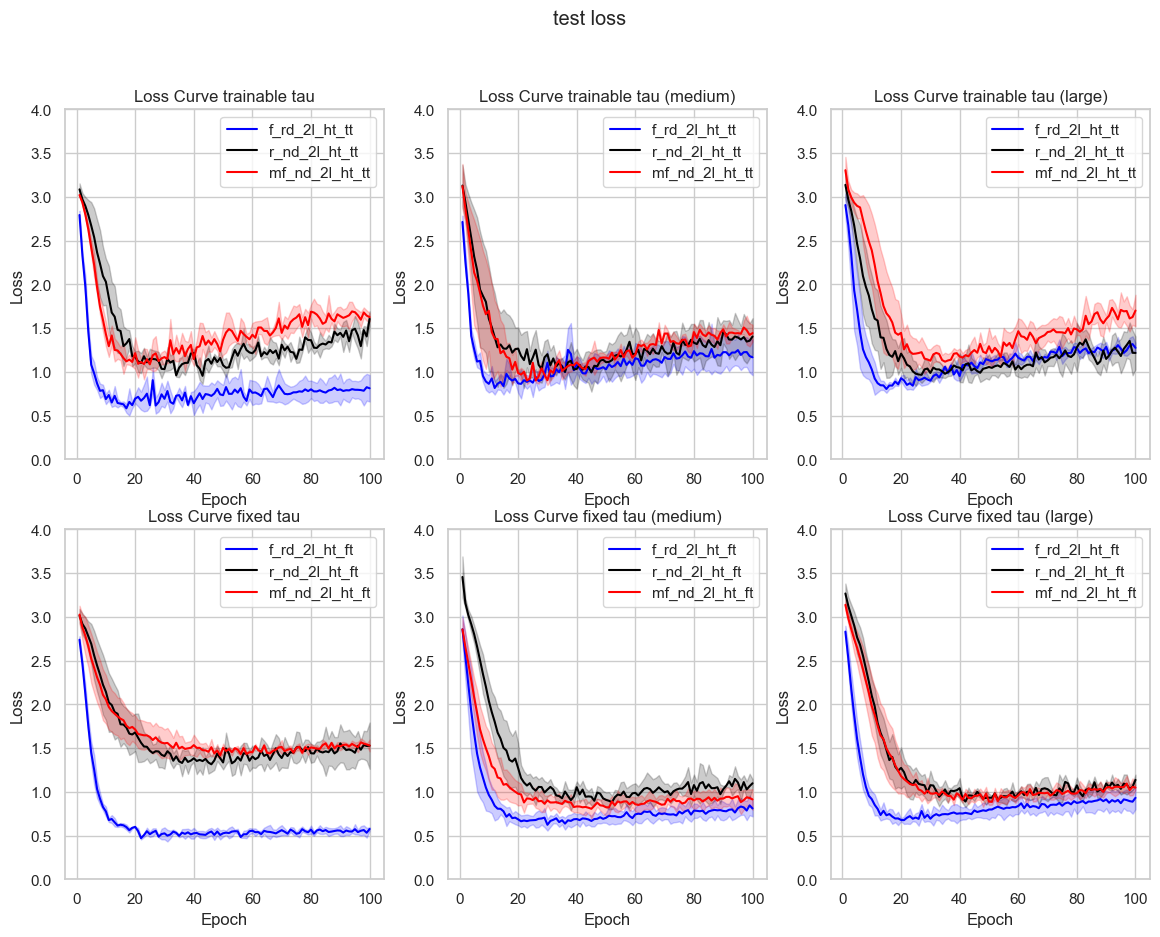

In [6]:
all_train_losses = tstloss_rd | tstloss_r | tstloss_mf
filtered_ht_tt = {key:value for key, value in all_train_losses.items() if 'ht_tt' in key}
filtered_ht_ft = {key:value for key, value in all_train_losses.items() if 'ht_ft' in key}

all_train_losses_mt = tstloss_rd_mt | tstloss_r_mt | tstloss_mf_mt
filtered_ht_tt_mt = {key:value for key, value in all_train_losses_mt.items() if 'ht_tt' in key}
filtered_ht_ft_mt = {key:value for key, value in all_train_losses_mt.items() if 'ht_ft' in key}

all_train_losses_lt = tstloss_rd_lt | tstloss_r_lt | tstloss_mf_lt
filtered_ht_tt_lt = {key:value for key, value in all_train_losses_lt.items() if 'ht_tt' in key}
filtered_ht_ft_lt = {key:value for key, value in all_train_losses_lt.items() if 'ht_ft' in key}

import itertools
colors = itertools.cycle(["blue", "black", 'red'])

ylim = 4
plt.figure(figsize=(14,10))
plt.suptitle('test loss')
plt.subplot(231)
for key, value in filtered_ht_tt.items():
    plt.title('Loss Curve trainable tau')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)
plt.subplot(234)
for key, value in filtered_ht_ft.items():
    plt.title('Loss Curve fixed tau')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)
plt.subplot(232)
for key, value in filtered_ht_tt_mt.items():
    plt.title('Loss Curve trainable tau (medium)')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)
plt.subplot(235)
for key, value in filtered_ht_ft_mt.items():
    plt.title('Loss Curve fixed tau (medium)')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)
plt.subplot(233)
for key, value in filtered_ht_tt_lt.items():
    plt.title('Loss Curve trainable tau (large)')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)
plt.subplot(236)
for key, value in filtered_ht_ft_lt.items():
    plt.title('Loss Curve fixed tau (large)')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0,ylim)

Training the taus has an overfitting effect, especially as the initial taus get larger

Taus

In [7]:
import torch
def convert_to_taus(tau_m_snn, duration_ms, simulation_steps, mode='discrete'):
    
    taus_real = []
    taus_discrete = []

    delta_t = duration_ms/simulation_steps
    for tau_m in tau_m_snn:
        print(tau_m)
        taus_real.append(-delta_t/torch.log(torch.sigmoid(tau_m)).detach().cpu().numpy())
        taus_discrete.append(-1.0/torch.log(torch.sigmoid(tau_m)).detach().cpu().numpy())

    if mode == 'real':
        return taus_real
    elif mode == 'discrete':
        return taus_discrete

def tau_process(tau_m, dd):
    for model in tau_m.keys():
        time_ms = dd[model][0]['time_ms']
        tau_m[model] = [convert_to_taus(tau_m[model][x], time_ms, 50, 'discrete') for x in range(len(tau_m[model]))]
    return tau_m

In [8]:
attributes = ['tau_m_h', 'dataset_dict']

tau_m_r, dd, _, __ = get_states(ckpt_dir1, sweep_params_names, attributes, rpts=3, batch_size=128, device='cuda:0', mode='last')
tau_m_r = tau_process(tau_m_r, dd)

tau_m_mf, dd, _, __ = get_states(ckpt_dir2, sweep_params_names_mf, attributes, rpts=3, batch_size=128, device='cuda:0', mode='last')
tau_m_mf = tau_process(tau_m_mf, dd)

tau_m_rd, dd, _, __ = get_states(ckpt_dir3, sweep_params_names_rd, attributes, rpts=3, batch_size=128, device='cuda:0', mode='last')
tau_m_rd = tau_process(tau_m_rd, dd)

tau_m_r_mt, dd, _, __ = get_states(ckpt_dir4, sweep_params_names, attributes, rpts=3, batch_size=128, device='cuda:0', mode='last')
tau_m_r_mt = tau_process(tau_m_r_mt, dd)

tau_m_mf_mt, dd, _, __ = get_states(ckpt_dir5, sweep_params_names_mf, attributes, rpts=3, batch_size=128, device='cuda:0', mode='last')
tau_m_mf_mt = tau_process(tau_m_mf_mt, dd)

tau_m_rd_mt, dd, _, __ = get_states(ckpt_dir6, sweep_params_names_rd, attributes, rpts=3, batch_size=128, device='cuda:0', mode='last')
tau_m_rd_mt = tau_process(tau_m_rd_mt, dd)

tau_m_r_lt, dd, _, __ = get_states(ckpt_dir7, sweep_params_names, attributes, rpts=3, batch_size=128, device='cuda:0', mode='last')
tau_m_r_lt = tau_process(tau_m_r_lt, dd)

tau_m_mf_lt, dd, _, __ = get_states(ckpt_dir8, sweep_params_names_mf, attributes, rpts=3, batch_size=128, device='cuda:0', mode='last')
tau_m_mf_lt = tau_process(tau_m_mf_lt, dd)

tau_m_rd_lt, dd, _, __ = get_states(ckpt_dir9, sweep_params_names_rd, attributes, rpts=3, batch_size=128, device='cuda:0', mode='last')
tau_m_rd_lt = tau_process(tau_m_rd_lt, dd)

Parameter containing:
tensor([ 8.2081,  5.7099,  7.5421,  6.2246,  8.1458,  7.9982,  5.9469,  5.7556,
         9.4076,  6.9786,  6.9891,  7.3626,  6.7966,  4.8053,  8.5572,  8.0565,
         6.6839,  6.8999,  6.1373,  7.4571,  8.0177,  7.8585,  6.2561,  7.5262,
         8.3126,  5.7892,  7.7644, 10.0789,  7.2900,  6.1246,  6.4957,  5.7672,
         5.9775,  4.8740,  6.9909,  4.5482,  6.2485,  6.8583,  7.8269,  7.5836,
         5.9395,  8.1690,  7.3866,  7.0670,  8.6219,  6.7355,  8.2065,  6.1328,
         6.5721,  6.7035,  6.9682,  7.0639,  6.4571,  6.7416,  6.4895,  7.1412,
         6.7318,  8.4405,  7.0860,  8.5628,  7.3535,  6.2408,  7.4877,  5.8149],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([6.4993, 7.9774, 8.7913, 6.9144, 6.1022, 5.1672, 8.4339, 6.4459, 7.9026,
        6.6140, 9.1232, 6.4981, 7.3966, 7.0554, 6.5040, 6.5338, 7.4260, 7.1073,
        6.6120, 7.8581, 6.3411, 6.8223, 7.1029, 5.7195, 7.2253, 5.8751, 6.5721,
        8.1130, 5.9898, 7.3300,

Next three graphs are initial and final taus. \
Trained taus are always higher, no matter the initialization. \
If we order the gaps between initial and final taus, it's: MF, recurrent and delays (as expected.)


C:\Users\Alberto\AppData\Local\Temp\ipykernel_33796\3526167486.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  plot_boxplots(df_tau.applymap(lambda x: np.mean(x[layer])), "Blues")


Text(0, 0.5, 'Tau')

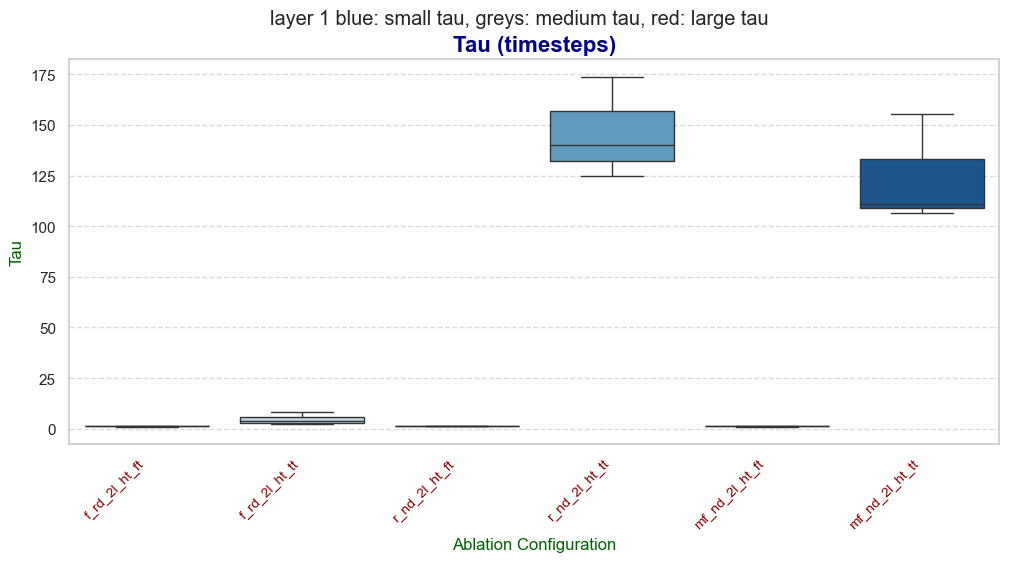

In [9]:
import numpy as np
df_tau = pd.DataFrame(tau_m_rd | tau_m_r | tau_m_mf)
df_tau_mt = pd.DataFrame(tau_m_rd_mt | tau_m_r_mt | tau_m_mf_mt)
df_tau_lt = pd.DataFrame(tau_m_rd_lt | tau_m_r_lt | tau_m_mf_lt)

layer = 1

plt.figure(figsize=(12, 5))
plt.suptitle(f"layer {layer} blue: small tau, greys: medium tau, red: large tau")
plot_boxplots(df_tau.applymap(lambda x: np.mean(x[layer])), "Blues")
# plot_boxplots(df_tau_mt.applymap(lambda x: np.mean(x[layer])), "Greys")
# plot_boxplots(df_tau_lt.applymap(lambda x: np.mean(x[layer])), "Reds")
plt.title("Tau (timesteps)", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Tau", fontsize=12, color='darkgreen')

C:\Users\Alberto\AppData\Local\Temp\ipykernel_33796\968530725.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  plot_boxplots(df_tau_mt.applymap(lambda x: np.mean(x[layer])), "Greys")


Text(0, 0.5, 'Tau')

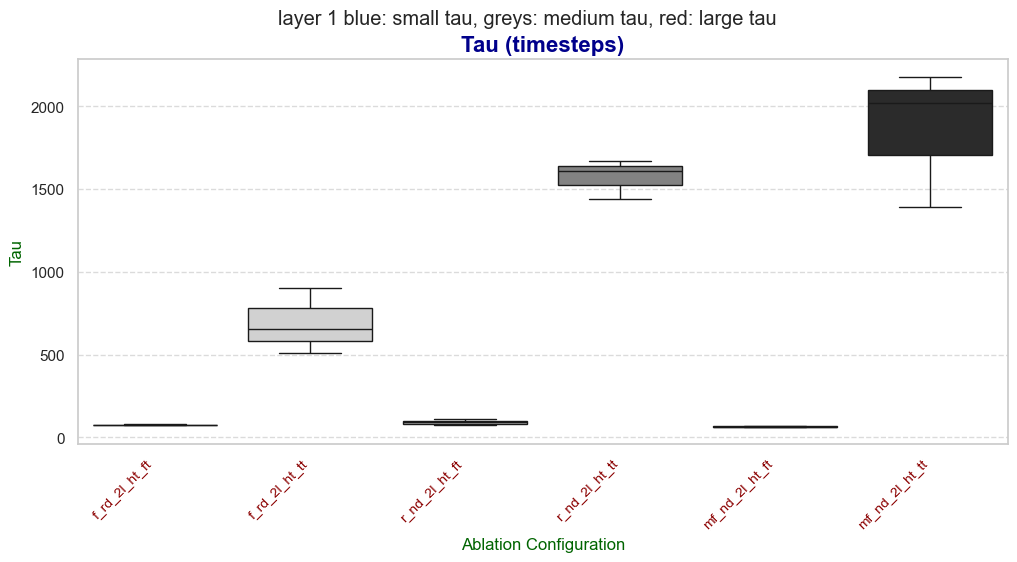

In [10]:
layer = 1

plt.figure(figsize=(12, 5))
plt.suptitle(f"layer {layer} blue: small tau, greys: medium tau, red: large tau")
# plot_boxplots(df_tau.applymap(lambda x: np.mean(x[layer])), "Blues")
plot_boxplots(df_tau_mt.applymap(lambda x: np.mean(x[layer])), "Greys")
# plot_boxplots(df_tau_lt.applymap(lambda x: np.mean(x[layer])), "Reds")
plt.title("Tau (timesteps)", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Tau", fontsize=12, color='darkgreen')

C:\Users\Alberto\AppData\Local\Temp\ipykernel_33796\4076917534.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  plot_boxplots(df_tau_lt.applymap(lambda x: np.mean(x[layer])), "Reds")


Text(0, 0.5, 'Tau')

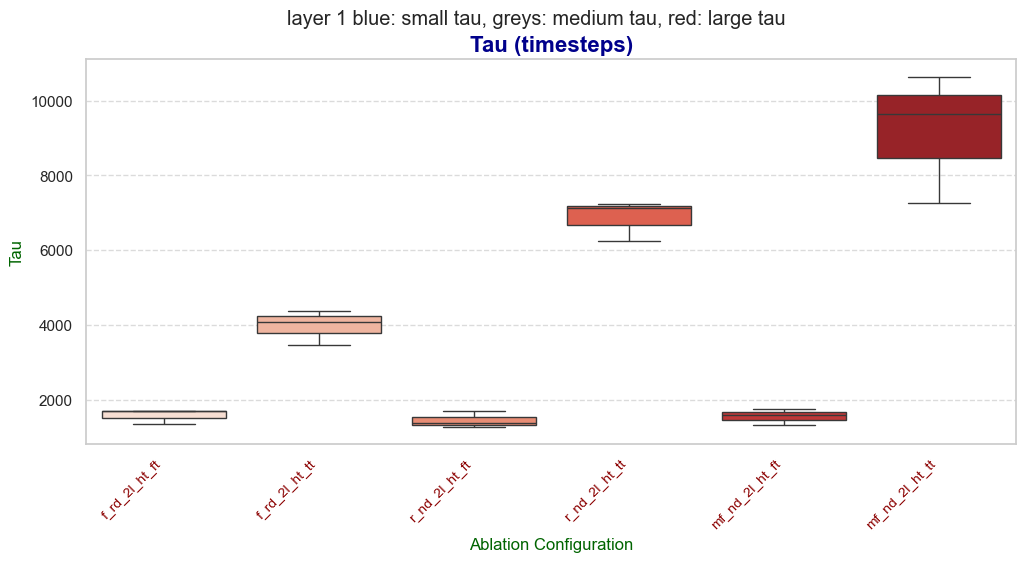

In [11]:
layer = 1

plt.figure(figsize=(12, 5))
plt.suptitle(f"layer {layer} blue: small tau, greys: medium tau, red: large tau")
# plot_boxplots(df_tau.applymap(lambda x: np.mean(x[layer])), "Blues")
# plot_boxplots(df_tau_mt.applymap(lambda x: np.mean(x[layer])), "Greys")
plot_boxplots(df_tau_lt.applymap(lambda x: np.mean(x[layer])), "Reds")
plt.title("Tau (timesteps)", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Tau", fontsize=12, color='darkgreen')

In [12]:
import torch
from snn_delays.utils.visualization_utils import plot_param
def plot_taus(taus_m_h, delta_t, num_timesteps= 50, label = 'taus', mode='discrete'):

    '''
    mode: real or discrete
    '''

    #delta_t = snn.dataset_dict.get('time_ms', 0)/snn.win

    num_subplots = len(taus_m_h)

    plt.title(f'Distribution of taus, {mode} time')
    for i, pseudo_tau_m in enumerate(taus_m_h):

        print(pseudo_tau_m)

        pseudo_tau_m = torch.Tensor(pseudo_tau_m)

        real_tau = -delta_t/torch.log(torch.sigmoid(pseudo_tau_m))

        if mode=='real':
            plt.subplot(num_subplots, 1, i+1)
            plot_param(real_tau, mode='histogram', label=label, distribution='kde')
            if i==num_subplots-1:
                plt.xlabel('time (ms)')

        elif mode=='discrete':
            plt.subplot(num_subplots, 1, i+1)
            #plot_param(real_tau/snn.win, mode='histogram')    
            plot_param(real_tau/delta_t, mode='histogram', label=label, distribution='kde')
            plt.axvline(x=num_timesteps, color='red', linestyle='--', linewidth=2)
    #        plt.xlim(0, snn.win)
            if i==num_subplots-1:
                plt.xlabel('simulation timestep')

        else:
            raise ValueError(f"Unsupported: {mode}. Choose from 'real', 'discrete'.")

    return plt.gca()

Tau values used (task duration 50 timesteps) \
small taus: 0-5 timesteps (mean around 2) \
medium taus: 0-300 timesteps (mean around 50) \
large taus: 0-100K timesteps (mean around 20K) \

Parameter containing:
tensor([-0.1577, -2.2537, -2.3424, -0.6476,  0.2582,  0.0282, -1.7637,  1.4002,
         0.4292,  0.4261, -0.2664,  0.1654, -1.3848, -0.2067,  0.1945, -2.7745,
         0.4839, -0.0495, -0.6617,  0.3068,  0.9220, -1.3802, -0.5037, -1.6097,
        -0.3795, -2.1203, -1.0387, -0.4470, -0.2224, -1.9083, -0.2101, -2.1459,
        -0.2163, -1.2858,  0.2212, -0.6837, -1.8838, -0.8187, -0.3004, -1.5907,
        -0.0706, -0.2053,  0.0298, -1.4064,  0.2223, -1.3928, -0.8642, -1.5731,
         0.4053, -1.5368,  0.9533,  0.3367, -0.8586, -0.3005,  1.4346, -0.3731,
        -0.5409, -1.8737,  0.0050,  0.8977, -1.3344, -0.4567, -1.4310,  0.0519],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-1.4987, -1.2862, -0.3143,  0.0798,  0.8672, -1.2270, -0.8228,  0.0912,
         0.7562,  0.1790, -1.2325, -2.1275,  0.2944,  0.0378,  0.0522,  0.1514,
        -0.4266,  0.4953, -0.7376, -0.4464, -1.6882, -1.2403, -1.5443,  0.0244,
        -2.3082,  0.1772,  0.68

<Axes: xlabel='simulation timestep'>

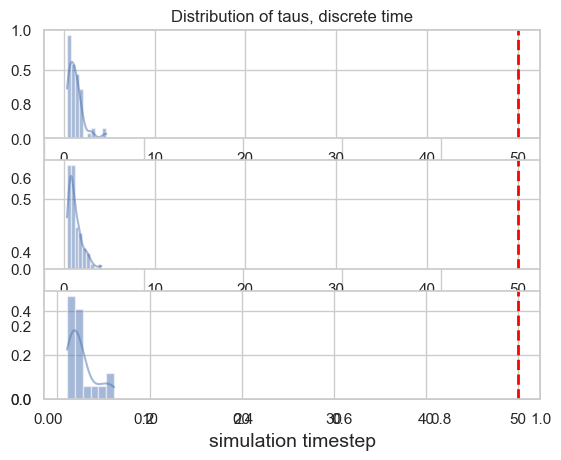

In [13]:
tau_m_r, dd, _, __ = get_states(ckpt_dir1, sweep_params_names, attributes, rpts=3, batch_size=128, device='cuda:0', mode='last')
plot_taus(tau_m_r['r_nd_2l_ht_ft'][0], 1e3/50)


Parameter containing:
tensor([3.8772, 4.8556, 5.2214, 5.5935, 5.7453, 3.8176, 3.5351, 1.7892, 3.6466,
        1.8778, 2.7859, 3.1891, 4.1574, 3.3453, 1.9923, 2.7526, 3.5387, 4.6458,
        4.3187, 4.9046, 1.6217, 3.2394, 3.5348, 2.9025, 4.6588, 4.2938, 4.5172,
        4.2931, 1.5824, 3.0820, 3.2582, 3.3308, 3.7940, 4.6391, 3.6882, 3.6558,
        3.5230, 3.7714, 4.4707, 4.4755, 3.4253, 5.0627, 3.9885, 3.4379, 2.2964,
        6.5731, 4.8132, 2.6120, 3.1142, 4.0014, 4.4107, 3.8626, 3.5571, 3.8219,
        3.7644, 4.1624, 4.3686, 3.2585, 3.3824, 5.5189, 5.5140, 3.4282, 1.4705,
        4.1169], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([3.9884, 3.9000, 3.2969, 5.2279, 5.3751, 2.4271, 7.1034, 4.2900, 4.5776,
        3.1627, 4.3228, 3.9167, 2.5222, 3.4745, 7.3261, 4.6043, 4.2171, 4.0958,
        4.5063, 4.4139, 4.5681, 4.4749, 3.9144, 2.8789, 2.0593, 3.8999, 3.5393,
        4.2044, 2.4467, 3.9635, 4.9852, 4.6804, 2.4525, 0.9255, 4.0443, 3.7339,
        3.0317, 4.6207

<Axes: xlabel='simulation timestep'>

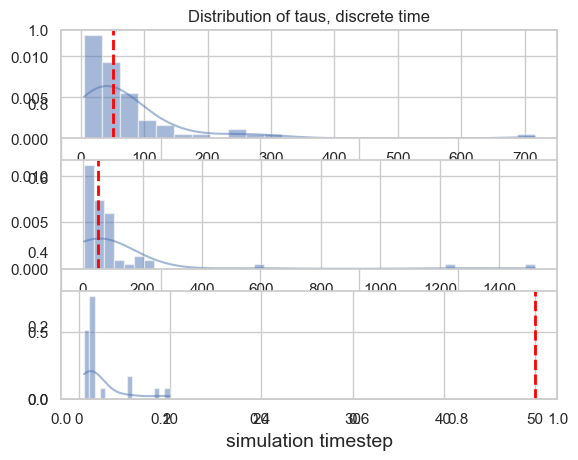

In [14]:
tau_m_r, dd, _, __ = get_states(ckpt_dir4, sweep_params_names, attributes, rpts=3, batch_size=128, device='cuda:0', mode='last')
plot_taus(tau_m_r['r_nd_2l_ht_ft'][0], 1e3/50)


Parameter containing:
tensor([8.1854, 7.7734, 6.6448, 5.7933, 5.9493, 7.8425, 6.9725, 7.5584, 8.1000,
        5.2512, 8.3386, 7.7899, 6.7377, 9.6328, 6.0659, 6.3191, 9.0510, 5.8196,
        7.1641, 5.4848, 7.6840, 6.7563, 7.3790, 6.6844, 7.1125, 6.5628, 6.6327,
        8.2830, 7.8118, 8.4501, 5.7713, 6.9615, 7.7981, 9.0591, 8.1086, 7.1327,
        7.7856, 7.8530, 7.3484, 7.4100, 7.3569, 7.4837, 8.0409, 5.9503, 7.8425,
        6.2664, 5.9906, 6.9332, 5.2048, 5.9333, 6.7487, 8.2128, 6.0274, 6.8275,
        5.8435, 7.5648, 8.7092, 6.5564, 7.0278, 7.7348, 6.0041, 5.5721, 6.8528,
        6.1847], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([6.3573, 7.0763, 6.6398, 7.9140, 5.5712, 7.0946, 7.0360, 6.3583, 4.9055,
        6.4144, 6.2896, 5.6601, 6.2602, 5.6373, 7.2392, 5.1316, 6.4866, 6.8659,
        5.4555, 8.4189, 6.3155, 7.8406, 7.7925, 8.1200, 6.6317, 8.0174, 9.3643,
        7.1836, 7.4083, 6.1751, 7.0906, 8.6401, 5.2535, 7.1960, 4.8928, 7.1747,
        6.3379, 7.1688

<Axes: xlabel='time (ms)'>

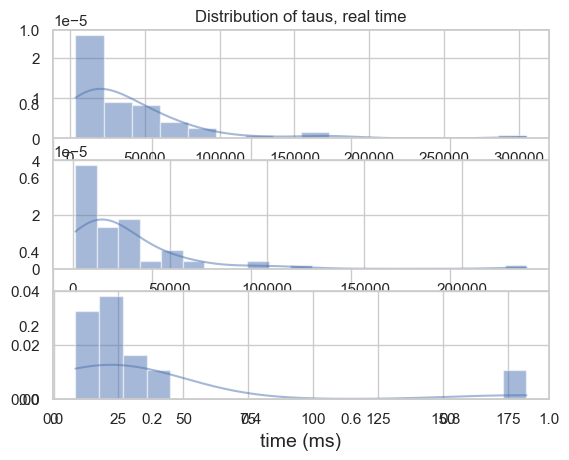

In [15]:
tau_m_r, dd, _, __ = get_states(ckpt_dir7, sweep_params_names, attributes, rpts=3, batch_size=128, device='cuda:0', mode='last')
plot_taus(tau_m_r['r_nd_2l_ht_ft'][0], 1e3/50, mode='real')

## Extra results: plotting the spikes

In [27]:
from snn_delays.utils.dataset_loader import DatasetLoader
from torch.utils.data import Subset, DataLoader
import numpy as np
'''
demonstration of parallel ablation.
serial: 200MB 6'30 min (caching: ram) aprox 260 mins in total
serial: 1.4GB 5'30 min (caching: gpu ram) aprox 220 min in total
parallel (1 rpt): 1.7GB: 160 minutes total (caching: ram)
parallel (1 rpt): 3.9GB: ?? minutes total (caching: gpu ram)
parallel (2 rps): 3.2GB: 165 minutes total (num_workers=0)
'''
import torch
torch.manual_seed(10)

dataset = 'shd'
total_time = 50
batch_size = 128

# DATASET
DL = DatasetLoader(dataset=dataset,
                   caching='gpu',
                   num_workers=0,
                   batch_size=batch_size,
                   total_time=total_time,
                   crop_to=1e6)
_, _, dataset_dict = DL.get_dataloaders()

train_dataset = DL._dataset.test_dataset
num_classes = DL._dataset.n_classes

class_indices = {}
for idx, (_, label) in enumerate(train_dataset):
    label = np.argmax(label)
    if label not in class_indices:
        class_indices[label] = []
    class_indices[label].append(idx)
    if len(class_indices) == num_classes:
        break
class_indices = dict(sorted(class_indices.items()))
sampled_indices = [np.random.choice(indices) for indices in class_indices.values()]

DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  crop_to=1e6)

_, __, dataset_dict = DL.get_dataloaders()

subset = Subset(DL._dataset.test_dataset, sampled_indices)
test_loader = DataLoader(subset, batch_size=len(sampled_indices), shuffle=False)

attributes = ['spike_state']

spks_r, _, __ = get_states(ckpt_dir1, sweep_params_names, attributes, rpts=1, loader = test_loader, batch_size=128, device='cuda:0', mode='max')

spks_mf, _, __ = get_states(ckpt_dir2, sweep_params_names_mf, attributes, rpts=1, loader = test_loader, batch_size=128, device='cuda:0', mode='max')

spks_rd, _, __ = get_states(ckpt_dir3, sweep_params_names_rd, attributes, rpts=1, loader = test_loader, batch_size=128, device='cuda:0', mode='max')

spks_r_mt, _, __ = get_states(ckpt_dir4, sweep_params_names, attributes, rpts=1, loader = test_loader, batch_size=128, device='cuda:0', mode='max')

spks_mf_mt, _, __ = get_states(ckpt_dir5, sweep_params_names_mf, attributes, rpts=1, loader = test_loader, batch_size=128, device='cuda:0', mode='max')

spks_rd_mt, _, __ = get_states(ckpt_dir6, sweep_params_names_rd, attributes, rpts=1, loader = test_loader, batch_size=128, device='cuda:0', mode='max')

spks_r_lt, _, __ = get_states(ckpt_dir7, sweep_params_names, attributes, rpts=1, loader = test_loader, batch_size=128, device='cuda:0', mode='max')

spks_mf_lt, _, __ = get_states(ckpt_dir8, sweep_params_names_mf, attributes, rpts=1, loader = test_loader, batch_size=128, device='cuda:0', mode='max')

spks_rd_lt, _, __ = get_states(ckpt_dir9, sweep_params_names_rd, attributes, rpts=1, loader = test_loader, batch_size=128, device='cuda:0', mode='max')

spks = spks_rd | spks_r | spks_mf
spks_mt = spks_rd_mt | spks_r_mt | spks_mf_mt
spks_lt = spks_rd_lt | spks_r_lt | spks_mf_lt

[CropTime(min=0, max=1000000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]
[CropTime(min=0, max=1000000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]
Loading model: r_nd_2l_ht_ft_rpt0_6545936395759718_max_94epoch

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
None
1000.0
Delta t: 20.0 ms
mean of normal: -0.541324854612918
Instance of <class 'snn_delays.snn.SNN'> loaded successfully


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\serialization.py:1113: SourceChangeWarning: source code of class 'snn_delays.snn.SNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


Test Loss: 1.5929664373397827
Avg spk_count per neuron for all 50 time-steps 7.324414253234863
Avg spk per neuron per layer [12.77890625, 16.51875]
Test Accuracy of the model on the test samples: 65.000

Loading model: r_nd_2l_ht_tt_rpt0_7539752650176679_max_73epoch

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
None
1000.0
Delta t: 20.0 ms
mean of normal: -0.541324854612918
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
Test Loss: 0.7580417990684509
Avg spk_count per neuron for all 50 time-steps 5.568749904632568
Avg spk per neuron per layer [11.59296875, 10.68203125]
Test Accuracy of the model on the test samples: 85.000

Loading model: mf_nd_2l_ht_ft_rpt0_5892226148409894_max_49epoch

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
None
1000.0
Delta t: 20.0 ms
mean of normal: -0.541324854612918
Instance of <class 'snn_delays.snn.SN

In [28]:
def plot_spikes(spike_state, layer, n):

    if type(n) == int:
        index = list(range(n))
    elif type(n) == list:
        assert type(n[0]) == int, "[ERROR] make sure n is an int or list of int" 
        index = n

    N = len(index)

    # Take the number of neurons in the layer
    num_neurons = spike_state[layer].shape[-1]

    total_time = 50

    # Plot the raster plot
    spk = spike_state[layer][:, index, :]
    spk = spk.cpu().detach().numpy().T.reshape(num_neurons, total_time * N)
    # plt.figure(figsize=(5, n))
    plt.imshow(spk, cmap='Greys')

    plt.ylabel('Neuron')
    plt.xlabel('Time (ms)')

    return plt.gca()

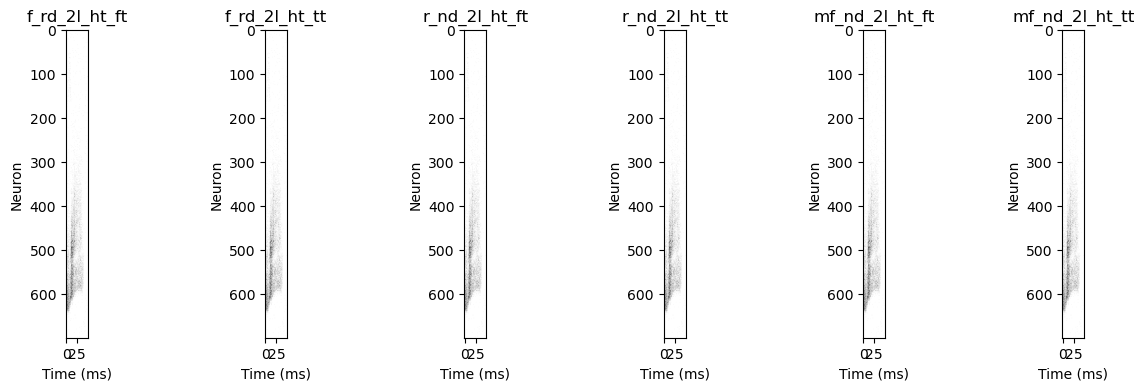

In [29]:
plt.figure(figsize=(15,4))
for i, key in enumerate(spks.keys()):
    plt.subplot(1, 6, i+1)
    plt.title(key)
    plot_spikes(spks[key][0], 'input', 1)
plt.show()

f_rd_2l_ht_ft: 0.0867944285273552
f_rd_2l_ht_tt: 0.06953124701976776
r_nd_2l_ht_ft: 0.0915551707148552
r_nd_2l_ht_tt: 0.0696093738079071
mf_nd_2l_ht_ft: 0.08281005918979645
mf_nd_2l_ht_tt: 0.06376220285892487


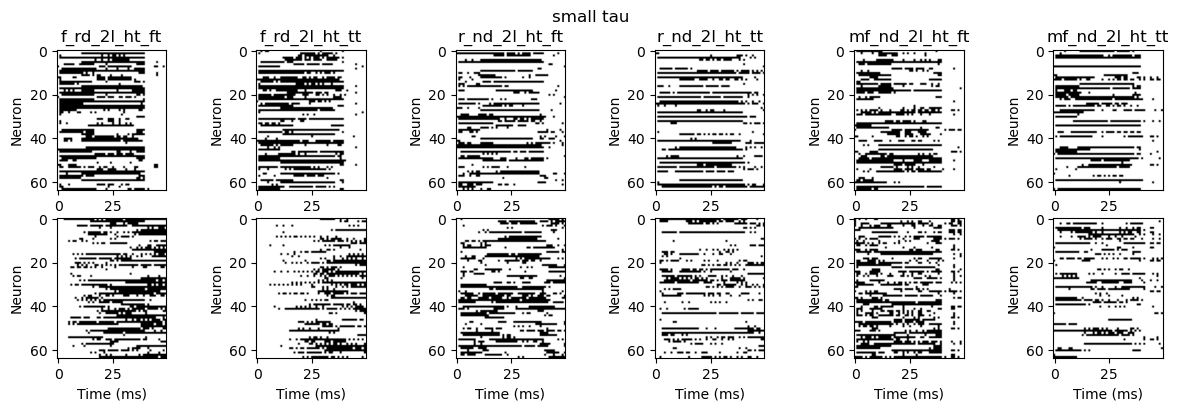

In [42]:
plt.figure(figsize=(15,4))
plt.suptitle('small tau')
for i, key in enumerate(spks.keys()):
    plt.subplot(2, 6, i+1)
    plt.title(key)
    plot_spikes(spks[key][0], 'f1', 1)

    plt.subplot(2, 6, 6+i+1)
    plot_spikes(spks[key][0], 'f2', 1)

    spk_count = (spks[key][0]['f1'].sum() + spks[key][0]['f2'].sum())/(128*50*64)
    print(f'{key}: {spk_count}')

plt.show()

In [41]:
spks[key][0]['f1'].sum()

tensor(14336., device='cuda:0')

f_rd_2l_ht_ft: 0.06386718899011612
f_rd_2l_ht_tt: 0.059709470719099045
r_nd_2l_ht_ft: 0.10932616889476776
r_nd_2l_ht_tt: 0.09496093541383743
mf_nd_2l_ht_ft: 0.07145263254642487
mf_nd_2l_ht_tt: 0.06429687142372131


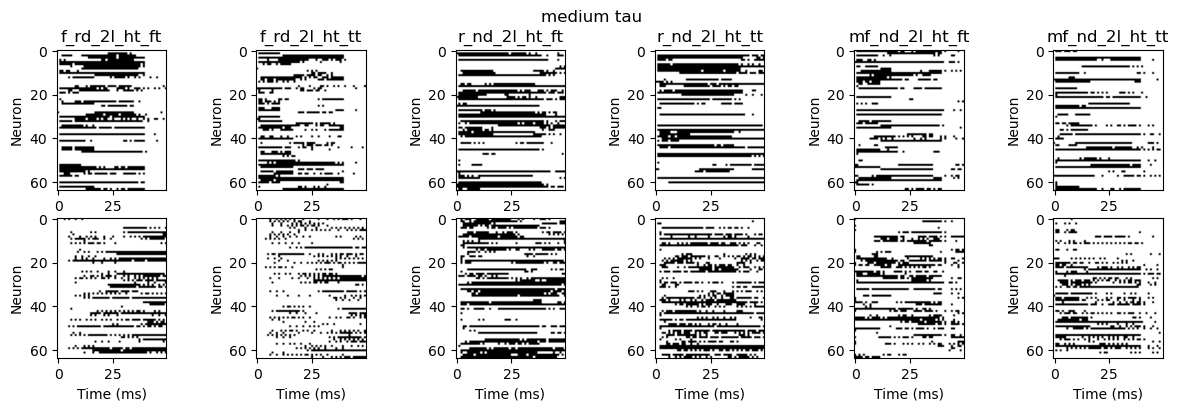

In [43]:
plt.figure(figsize=(15,4))
plt.suptitle('medium tau')
for i, key in enumerate(spks_mt.keys()):
    plt.subplot(2, 6, i+1)
    plt.title(key)
    plot_spikes(spks_mt[key][0], 'f1', 1)

    plt.subplot(2, 6, 6+i+1)
    plot_spikes(spks_mt[key][0], 'f2', 1)

    spk_count = (spks_mt[key][0]['f1'].sum() + spks_mt[key][0]['f2'].sum())/(128*50*64)
    print(f'{key}: {spk_count}')

plt.show()

f_rd_2l_ht_ft: 0.06878417730331421
f_rd_2l_ht_tt: 0.05495849624276161
r_nd_2l_ht_ft: 0.10047607123851776
r_nd_2l_ht_tt: 0.08933105319738388
mf_nd_2l_ht_ft: 0.07736816257238388
mf_nd_2l_ht_tt: 0.06193847581744194


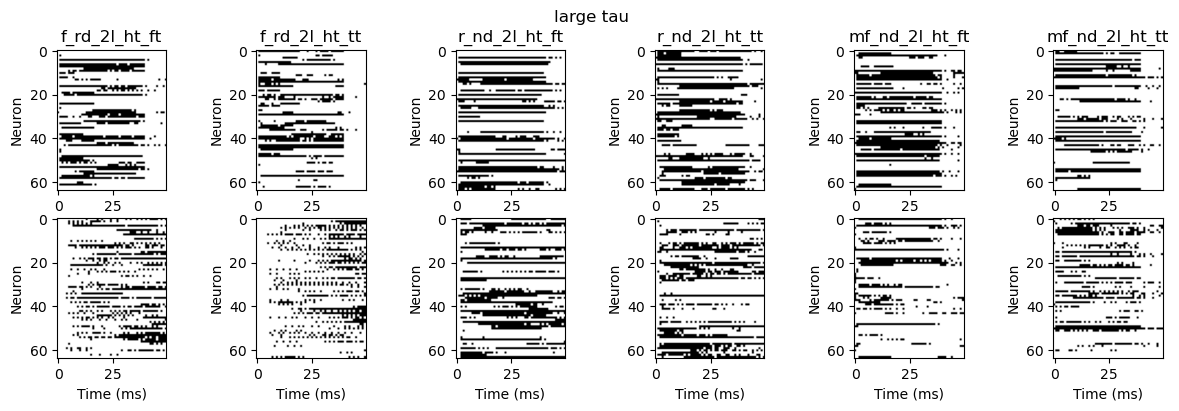

In [44]:
plt.figure(figsize=(15,4))
plt.suptitle('large tau')
for i, key in enumerate(spks_lt.keys()):
    plt.subplot(2, 6, i+1)
    plt.title(key)
    plot_spikes(spks_lt[key][0], 'f1', 1)

    plt.subplot(2, 6, 6+i+1)
    plot_spikes(spks_lt[key][0], 'f2', 1)

    spk_count = (spks_lt[key][0]['f1'].sum() + spks_lt[key][0]['f2'].sum())/(128*50*64)
    print(f'{key}: {spk_count}')

plt.show()